In [82]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [83]:
img = cv2.imread("./test/186e45b3-e553-4d02-9645-3815c3e2e34c.jpg")
img.shape

(1125, 750, 3)

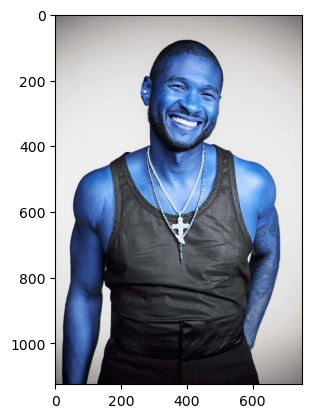

In [84]:
plt.imshow(img)

In [85]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(1125, 750)

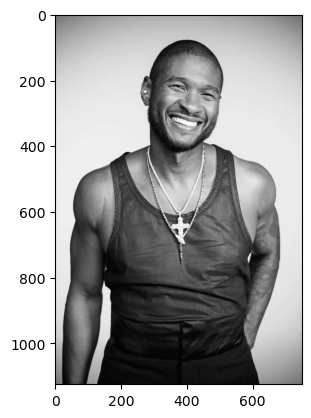

In [86]:
plt.imshow(gray, cmap="gray")

In [87]:
# code is copy-pasted from open-cv github ("Haar cascades")

import os
face_cascade_path = os.path.abspath("./opencv/haarcascades/haarcascade_frontalface_default.xml")
eye_cascade_path = os.path.abspath("./opencv/haarcascades//haarcascade_eye.xml")


face_cascade = cv2.CascadeClassifier(face_cascade_path)
eye_cascade = cv2.CascadeClassifier(eye_cascade_path)


faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[291, 129, 240, 240]])

In [88]:
(x,y,w,h) = faces[0]
x,y,w,h

(291, 129, 240, 240)

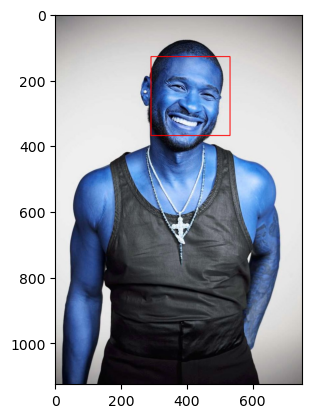

In [89]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h), (255,0,0),2)
plt.imshow(face_img)

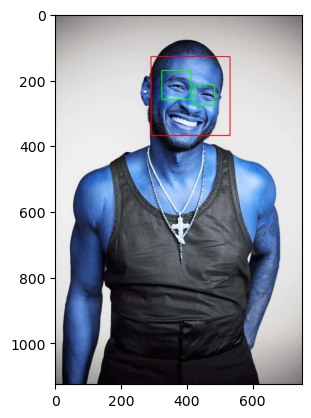

In [90]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h), (255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)

    for ex,ey,ew,eh in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh), (0,255,0),2)
            
        


plt.figure()
plt.imshow(face_img, cmap="gray")
plt.show()

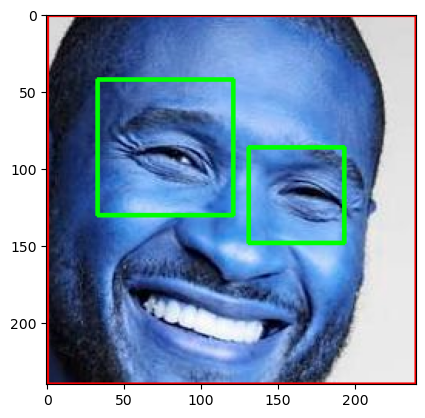

In [91]:
plt.imshow(roi_color, cmap="gray")

In [92]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color
        
        

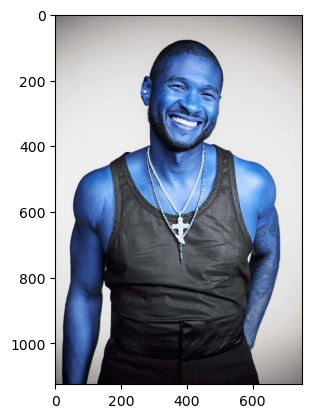

In [93]:
original_image = cv2.imread("./test/186e45b3-e553-4d02-9645-3815c3e2e34c.jpg")
plt.imshow(original_image)

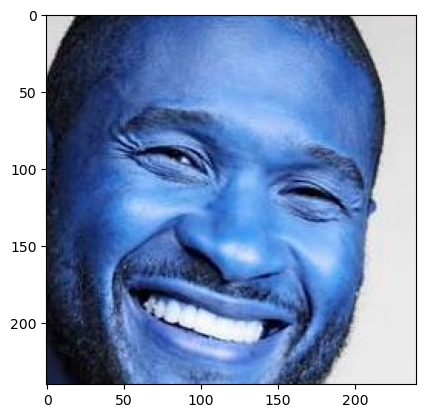

In [94]:
cropped_image = get_cropped_image_if_2_eyes("./test/186e45b3-e553-4d02-9645-3815c3e2e34c.jpg")
plt.imshow(cropped_image)

In [95]:
path_to_data = "../Dataset_images/"
path_to_cr_data = "../cropped_images/"

In [96]:
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

    


In [97]:
img_dirs

['../Dataset_images/ashton kutcher',
 '../Dataset_images/cardi b',
 '../Dataset_images/lana del rey',
 '../Dataset_images/marlon brando',
 '../Dataset_images/robbie williams',
 "../Dataset_images/ronnie o'sullivan",
 '../Dataset_images/usher',
 '../Dataset_images/weeknd']

In [98]:
import shutil
if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [99]:
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split("/")[-1]
    print(celebrity_name)

    celebrity_file_names_dict[celebrity_name] = []

    for entry in os.scandir(img_dir):
        try:
            roi_color = get_cropped_image_if_2_eyes(entry.path)
        except Exception:
            pass
        
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ", cropped_folder)

            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name

            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1



ashton kutcher
Generating cropped images in folder:  ../cropped_images/ashton kutcher
cardi b
Generating cropped images in folder:  ../cropped_images/cardi b
lana del rey
Generating cropped images in folder:  ../cropped_images/lana del rey
marlon brando
Generating cropped images in folder:  ../cropped_images/marlon brando
robbie williams
Generating cropped images in folder:  ../cropped_images/robbie williams
ronnie o'sullivan
Generating cropped images in folder:  ../cropped_images/ronnie o'sullivan
usher
Generating cropped images in folder:  ../cropped_images/usher
weeknd
Generating cropped images in folder:  ../cropped_images/weeknd


In [100]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

[[122 121 121 ...   0   0   0]
 [122 121 121 ...   0   0   0]
 [122 121 121 ...   0   0   0]
 ...
 [ 12  13  13 ...   0   0   0]
 [ 14  14  14 ...   0   0   0]
 [ 15  17  16 ...   0   0   0]]


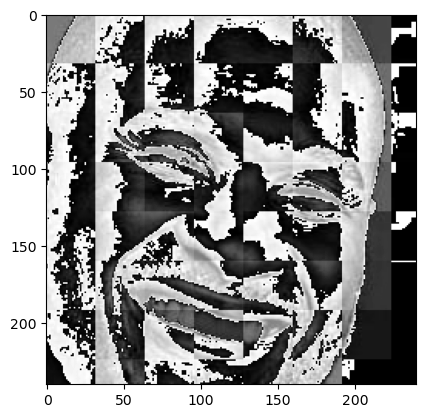

In [127]:
im_har = w2d(cropped_image,"db1", 5)
plt.imshow(im_har, cmap="gray")
print(im_har)

In [102]:
#   Now is to stack two images : normal and "inverted"

In [103]:
celebrity_file_names_dict

{'ashton kutcher': ['../cropped_images/ashton kutcher/ashton kutcher1.png',
  '../cropped_images/ashton kutcher/ashton kutcher2.png',
  '../cropped_images/ashton kutcher/ashton kutcher3.png',
  '../cropped_images/ashton kutcher/ashton kutcher4.png',
  '../cropped_images/ashton kutcher/ashton kutcher5.png',
  '../cropped_images/ashton kutcher/ashton kutcher6.png',
  '../cropped_images/ashton kutcher/ashton kutcher7.png',
  '../cropped_images/ashton kutcher/ashton kutcher8.png',
  '../cropped_images/ashton kutcher/ashton kutcher9.png',
  '../cropped_images/ashton kutcher/ashton kutcher10.png',
  '../cropped_images/ashton kutcher/ashton kutcher11.png',
  '../cropped_images/ashton kutcher/ashton kutcher12.png',
  '../cropped_images/ashton kutcher/ashton kutcher13.png',
  '../cropped_images/ashton kutcher/ashton kutcher14.png',
  '../cropped_images/ashton kutcher/ashton kutcher15.png',
  '../cropped_images/ashton kutcher/ashton kutcher16.png',
  '../cropped_images/ashton kutcher/ashton kutc

In [104]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'ashton kutcher': 0,
 'cardi b': 1,
 'lana del rey': 2,
 'marlon brando': 3,
 'robbie williams': 4,
 "ronnie o'sullivan": 5,
 'usher': 6,
 'weeknd': 7}

In [151]:
X = []
y = []

for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        if img is None:
            continue
        scalled_raw_img = cv2.resize(img, (32,32))
        img_har = w2d(img, "db1", 5)
        scalled_img_har = cv2.resize(img_har, (32,32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])


In [106]:
len(X[0])

4096

In [107]:
X[0]

array([[16],
       [18],
       [26],
       ...,
       [ 5],
       [ 5],
       [ 5]], dtype=uint8)

In [108]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(261, 4096)

# SVM

In [109]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipe = Pipeline([("scaler", StandardScaler()), ("svc", SVC(kernel = "rbf", C = 10))])

pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.6792452830188679

In [111]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.78      0.70      0.74        10
           1       0.50      0.50      0.50         6
           2       0.58      0.70      0.64        10
           3       1.00      0.40      0.57         5
           4       0.64      0.70      0.67        10
           5       0.57      0.80      0.67         5
           6       1.00      1.00      1.00         3
           7       1.00      0.75      0.86         4

    accuracy                           0.68        53
   macro avg       0.76      0.69      0.70        53
weighted avg       0.71      0.68      0.68        53



In [112]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [113]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [114]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.668641,"{'svc__C': 10, 'svc__kernel': 'rbf'}"
1,random_forest,0.461789,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.687573,{'logisticregression__C': 5}


In [115]:
best_estimators["svm"].score(X_test, y_test)

0.6792452830188679

In [116]:
best_estimators["random_forest"].score(X_test, y_test)

0.5471698113207547

In [117]:
best_estimators["logistic_regression"].score(X_test, y_test)

0.5849056603773585

In [118]:
best_clf = best_estimators["logistic_regression"]

In [119]:
from sklearn.metrics import confusion_matrix

cm =confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[8, 0, 0, 0, 2, 0, 0, 0],
       [0, 2, 2, 0, 2, 0, 0, 0],
       [1, 2, 4, 2, 0, 1, 0, 0],
       [0, 0, 0, 2, 2, 1, 0, 0],
       [1, 2, 1, 0, 5, 0, 1, 0],
       [0, 0, 0, 0, 0, 5, 0, 0],
       [0, 0, 0, 0, 0, 0, 2, 1],
       [0, 0, 0, 0, 0, 1, 0, 3]], dtype=int64)

([<matplotlib.axis.XTick at 0x26cdab2a930>,
 [Text(0.5, 0, 'ashton kutcher'),
  Text(1.5, 0, 'cardi b'),
  Text(2.5, 0, 'lana del rey'),
  Text(3.5, 0, 'marlon brando'),
  Text(4.5, 0, 'robbie williams'),
  Text(5.5, 0, "ronnie o'sullivan"),
  Text(6.5, 0, 'usher'),
  Text(7.5, 0, 'weeknd')])

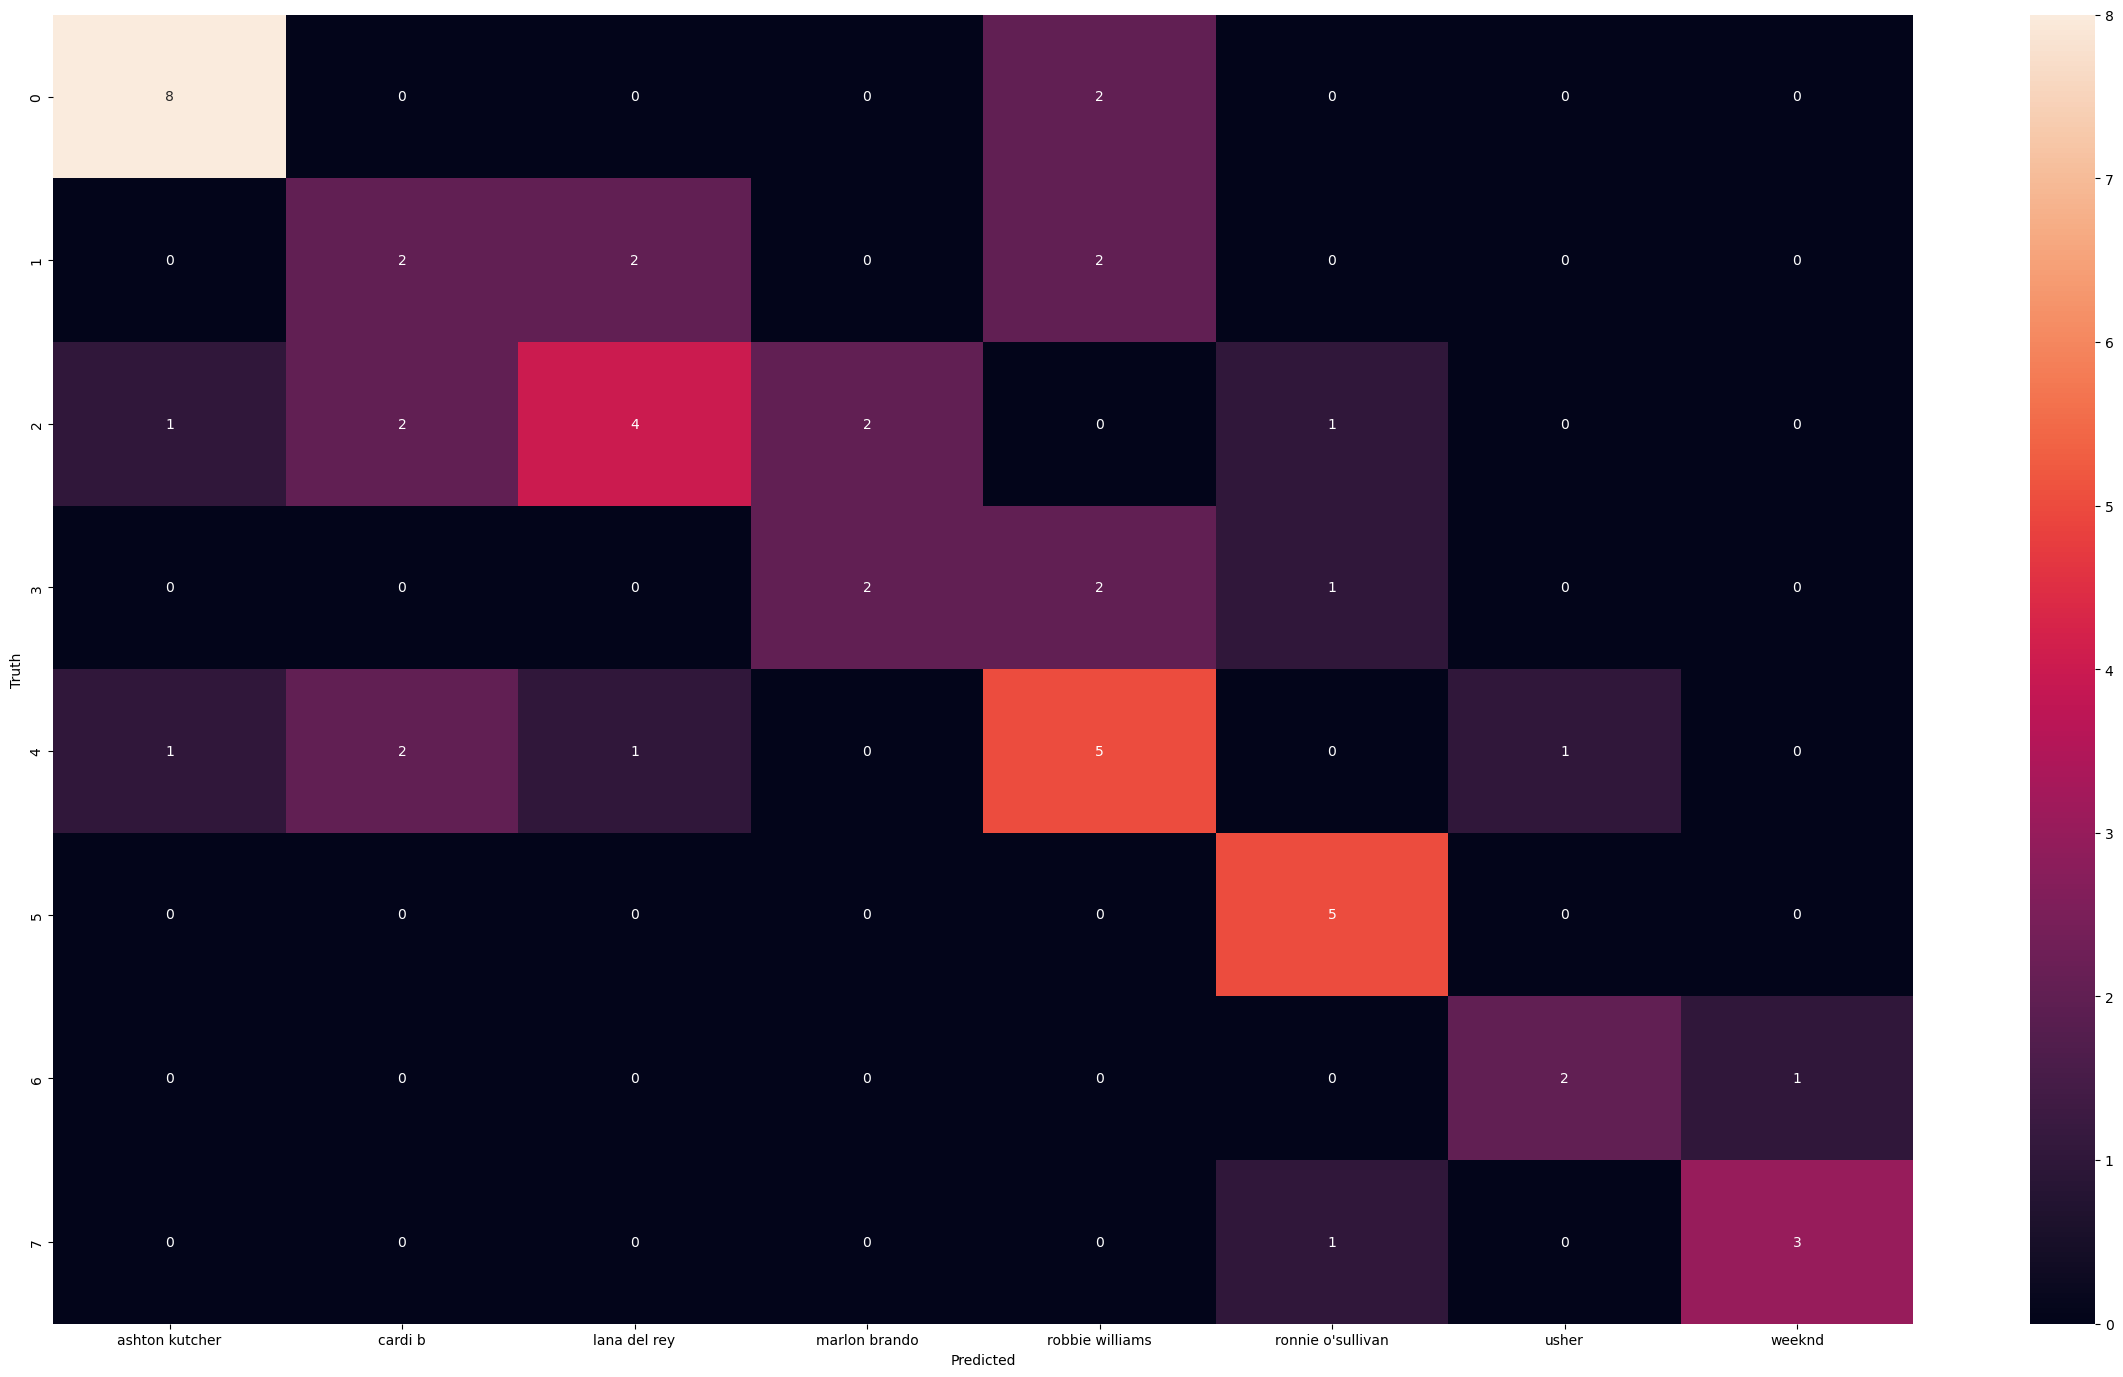

In [120]:
import seaborn as sns
plt.figure(figsize=(30,17))
sns.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.xticks(ticks=[0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5], labels=[key for key, value in class_dict.items()])

In [121]:
class_dict

{'ashton kutcher': 0,
 'cardi b': 1,
 'lana del rey': 2,
 'marlon brando': 3,
 'robbie williams': 4,
 "ronnie o'sullivan": 5,
 'usher': 6,
 'weeknd': 7}

In [122]:
import joblib

joblib.dump(best_clf, "saved_model.pkl")

['saved_model.pkl']

In [123]:
import json
with open ("class_dictionary.json", "w") as f:
    f.write(json.dumps(class_dict))

[[ 60  61  61 ... 254 254 254]
 [ 63  63  64 ... 254 254 254]
 [ 62  62  63 ... 254 254 254]
 ...
 [  2   2   2 ...   2   2   2]
 [  2   2   2 ...   2   2   2]
 [  2   2   2 ...   2   2   2]]


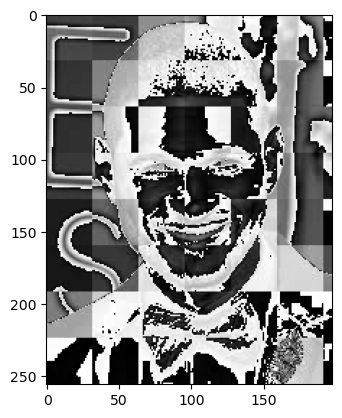

In [131]:


def image_changer(image):
    img = cv2.imread(image)
    return img
img = image_changer("./test/images (5).jpg")

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

print(w2d(img, "db1", 5))
plt.imshow(w2d(img, "db1", 5), cmap="gray")

In [154]:
def guess_image(img):
    img = cv2.imread(img)
    scalled_raw_img = cv2.resize(img, (32,32))
    img_har = w2d(img, "db1", 5)
    scalled_img_har = cv2.resize(img_har, (32,32))
    combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
    combined_img = np.array(combined_img).reshape(1,4096).astype(float)
    return combined_img



best_clf.predict(guess_image("../Dataset_images/ronnie o'sullivan/4b1dadc7-2174-403b-8f21-42e00dbb1822.jpeg"))[0]

3